# **PCA-based Reconstruction**

**PCA using the Correlation Matrix**

1. **Standardization**:
 $ x_{\text{standardized}}^{(i)} = \frac{x^{(i)} - \mu^{(i)}}{\sigma^{(i)}} $
 where:
 - $\mu^{(i)}$: Mean of $i$-th feature column
 - $\sigma^{(i)}$: Standard deviation of $i$-th feature column
 - $x^{(i)}$: $i$-th feature column
 - $x_{\text{standardized}}^{(i)}$: Standardized $i$-th feature column (zero mean, unit variance)

2. **Sample Correlation Matrix**:
 $ R = \frac{1}{n-1} X_{\text{standardized}}^T X_{\text{standardized}} $
 where:
 - $R$: Correlation matrix of size (features × features)
 - $n$: Number of samples
 - $X_{\text{standardized}}$: Matrix of all standardized columns (samples × features)

3. **Eigenvalue Decomposition**:
 $ R = V \Lambda V^T $
 where:
 - $V$: Matrix of eigenvectors (principal components) of size (features × features)
 - $\Lambda$: Diagonal matrix of eigenvalues (variances along principal components)
 - $V^T$: Transpose of eigenvector matrix

4. **Projection**:
 $ Z = X_{\text{standardized}} V $
 where:
 - $Z$: Projected data in principal component space (samples × features)
 - $V$: Principal component directions

5. **Reconstruction**:
 $ X_{\text{reconstructed}} = Z V^T D + M $
 where:
 - $X_{\text{reconstructed}}$: Data reconstructed in original space
 - $D$: Diagonal matrix of original standard deviations (features × features)
 - $M$: Matrix of means (samples × features), where each row is the mean vector repeated

**Key Points:**
- Use $n-1$ for unbiased estimation in the correlation matrix (Bessel's Correction)
- Each feature column $x^{(i)}$ is standardized independently
- Eigenvalues in $\Lambda$ represent the variance explained by each principal component
- $V$ columns are sorted by decreasing eigenvalues (most important components first)
- Perfect reconstruction is possible using all components, lossy when using fewer
- $D$ is a diagonal matrix of standard deviations (features × features)
- $M$ is mean matrix created by repeating mean vector for each sample (samples × features)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Data Generation
np.random.seed(47)
plt.style.use('dark_background')
mean = np.array([5, 10])
cov = np.array([[10, 3], [3, 1]])
n = 100
X = np.random.multivariate_normal(mean, cov, size=n)

# Adding anomalies
anomalies = np.array([[5, 12], [-2.5, 2], [10, 14]])
X = np.vstack([X, anomalies])
n = X.shape[0]
# Standardizing the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std 

# Covariance matrix and PCA
R = X_standardized.T @ X_standardized / (n - 1)
eigenvalues, eigenvectors = np.linalg.eigh(R)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Projecting and reconstructing
Z = X_standardized @ eigenvectors[:, :1]
D = np.diag(X_std)                  
X_reconstructed = (
    Z @ eigenvectors[:, :1].T @ D + X_mean
)

# Reconstruction errors
reconstruction_errors = np.linalg.norm(X - X_reconstructed, ord=2, axis=1)
threshold = np.percentile(reconstruction_errors, 95)  # Threshold for anomaly detection (95th percentile)

# Step 6: Print original and reconstructed data samples
print("\nOriginal Data (first 5 samples):\n", X[:5])
print("\nReconstructed Data (first 5 samples):\n", X_reconstructed[:5])


Original Data (first 5 samples):
 [[ 7.56602935 11.19005407]
 [ 2.02233349  9.30102911]
 [ 8.17635236 11.53044291]
 [ 8.12921555 11.20800311]
 [ 5.98339063 10.11031892]]

Reconstructed Data (first 5 samples):
 [[ 7.6611491  11.14965863]
 [ 2.66524339  9.02799825]
 [ 8.36706998 11.44944899]
 [ 7.96387464 11.27822006]
 [ 5.59859543 10.27373369]]


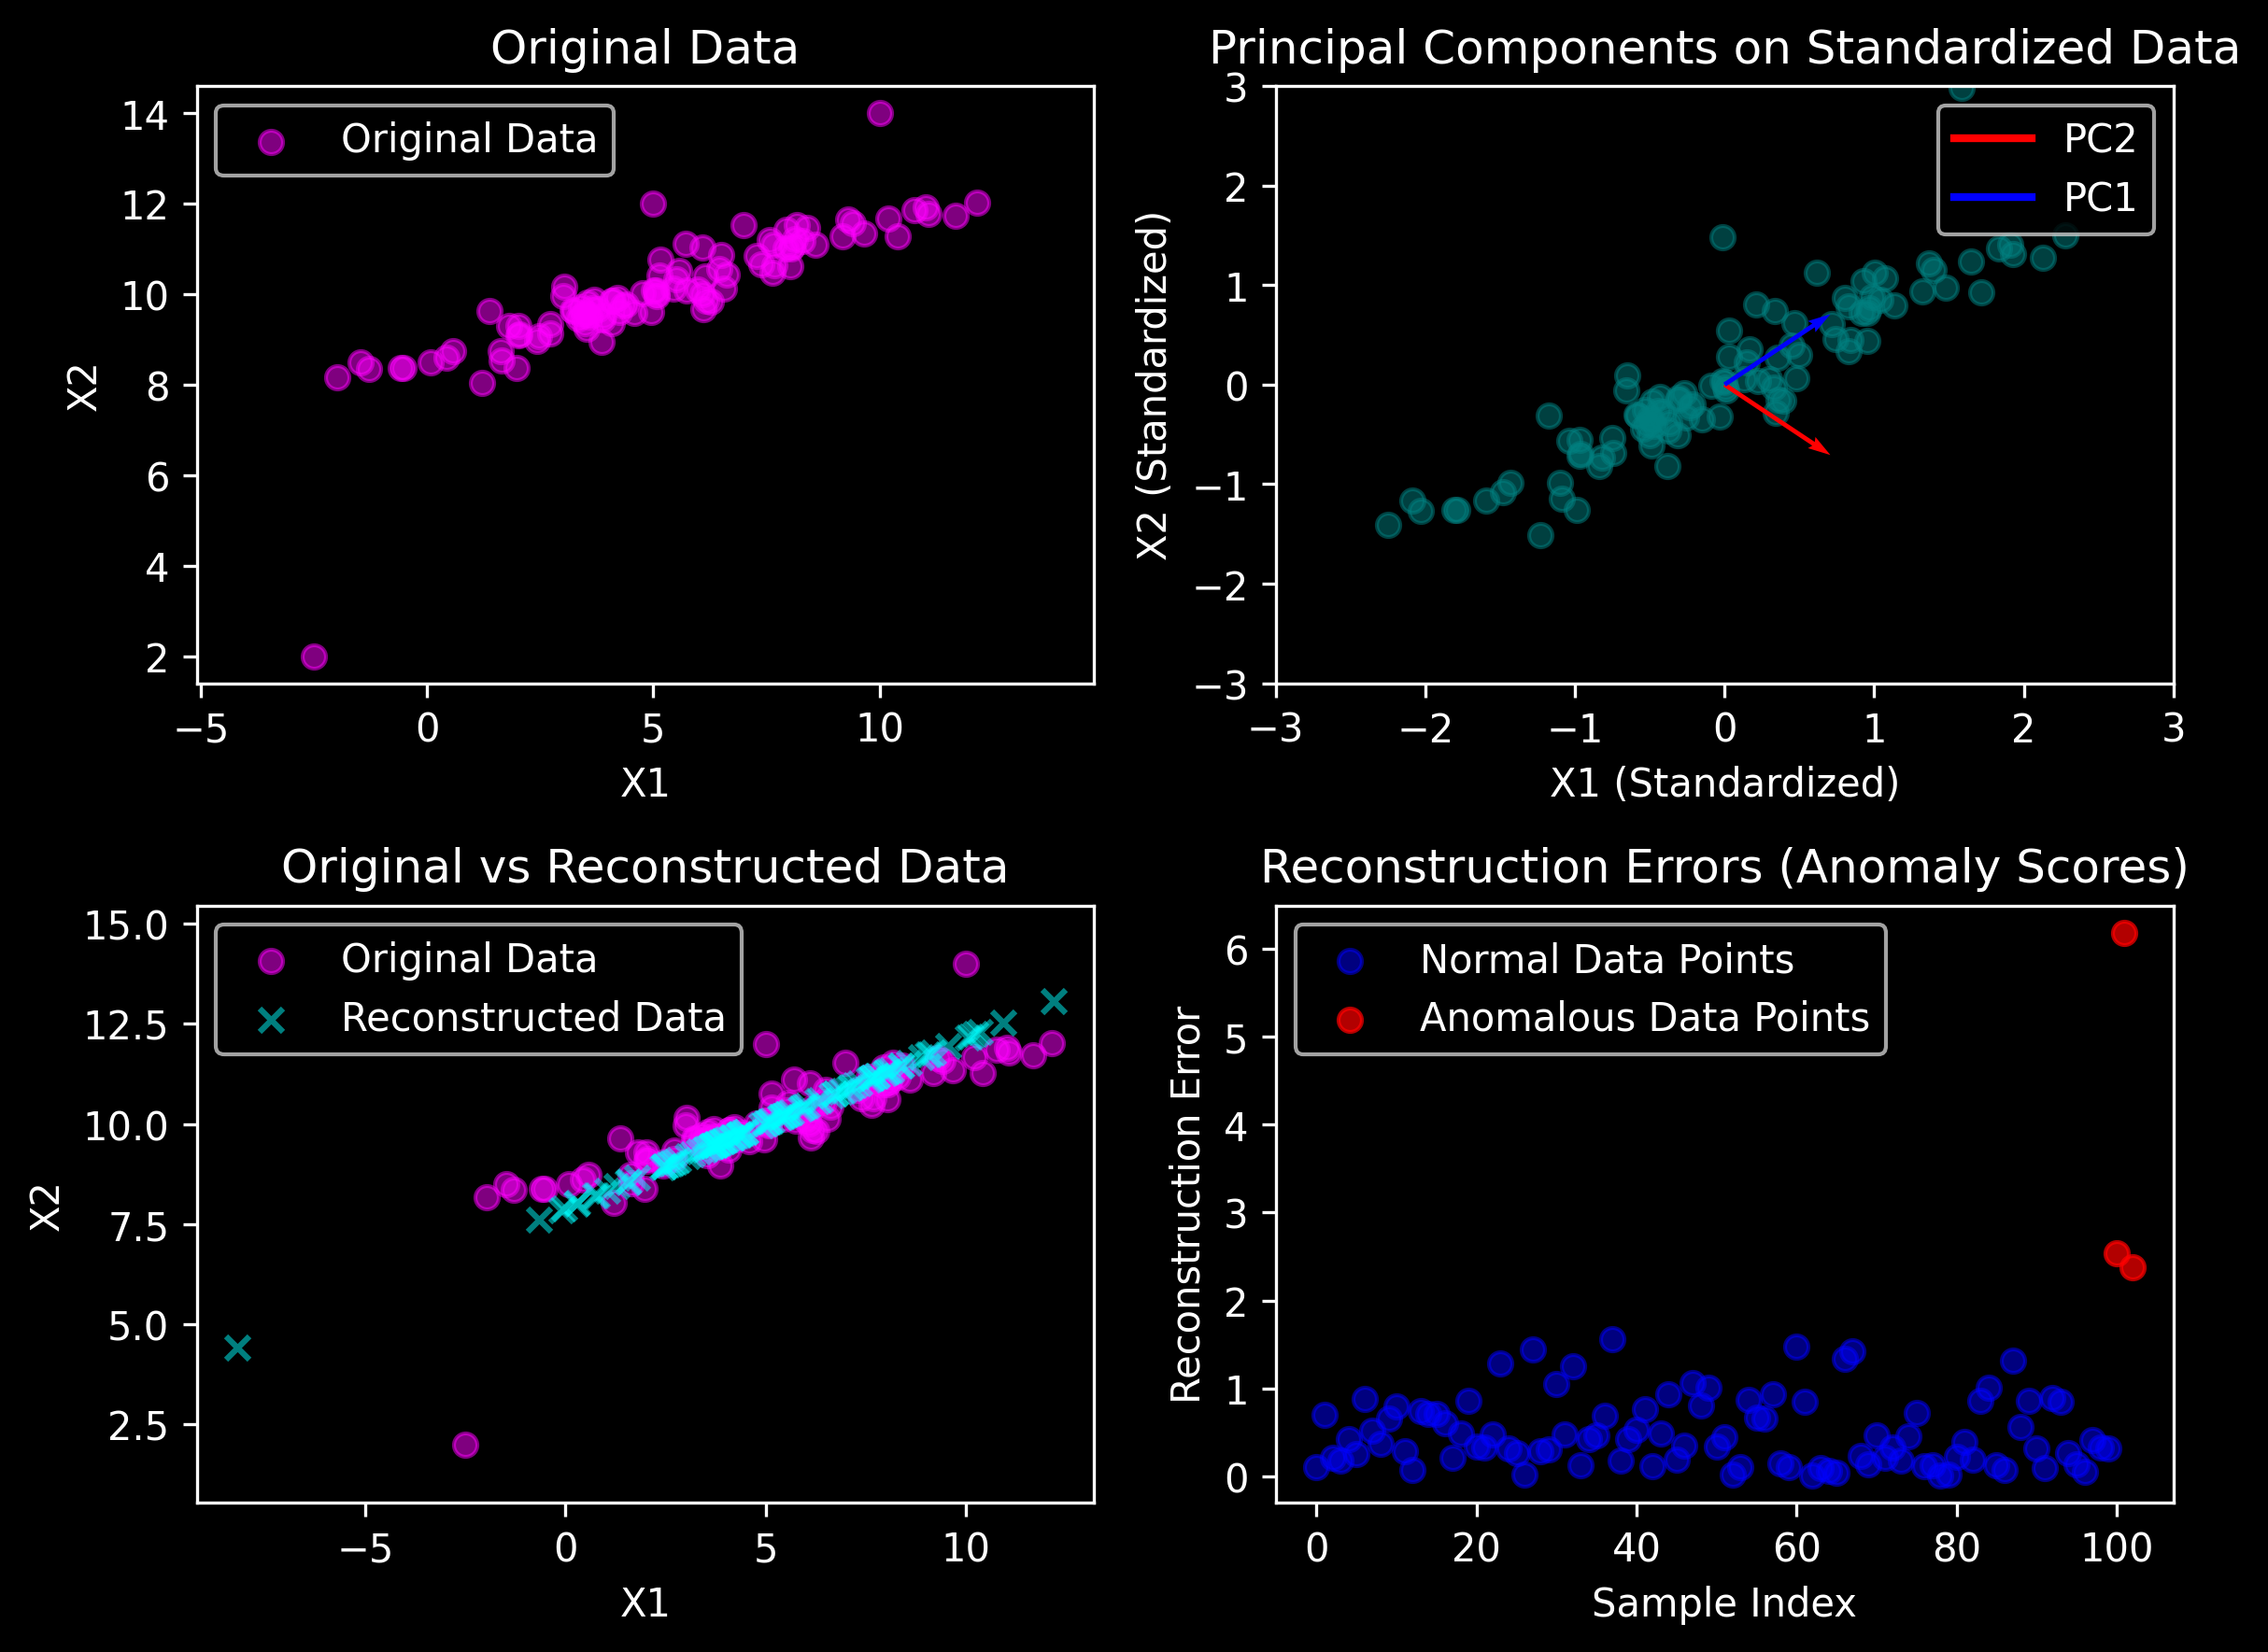

In [2]:
# Visualizations
plt.figure(figsize=(8, 6), dpi=300)

# Plot-1: Original Data
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label="Original Data", color='magenta')
plt.title("Original Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.legend()

# Plot-2: Principal Components on Standardized Data
plt.subplot(2, 2, 2)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], alpha=0.5, label="Standardized Data", color='teal')
origin = np.zeros((2, 2))  # Two origins, one for each eigenvector
plt.quiver(
    origin[:, 0], origin[:, 1],  # Origin points
    eigenvectors[:, 0], eigenvectors[:, 1],  # Eigenvector components
    angles='xy', scale_units='xy', scale=1, color=['r', 'b'], width=0.005
)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("Principal Components on Standardized Data")
plt.xlabel("X1 (Standardized)")
plt.ylabel("X2 (Standardized)")

# Create custom legend handles for arrows
legend_elements = [Line2D([0], [0], color='r', lw=2, label='PC2'),
                   Line2D([0], [0], color='b', lw=2, label='PC1')]
plt.legend(handles=legend_elements)

# Plot-3: Original vs Reconstructed Data
plt.subplot(2, 2, 3)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label="Original Data", color='magenta')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.5, label="Reconstructed Data", marker='x', color='cyan')
plt.title("Original vs Reconstructed Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.legend()

# Plot-4: Reconstruction Errors and Highlight Anomalies
plt.subplot(2, 2, 4)
plt.scatter(np.arange(len(reconstruction_errors))[:-3], reconstruction_errors[:-3], 
            color='blue', alpha=0.5, label="Normal Data Points")
plt.scatter(np.arange(len(reconstruction_errors))[-3:], reconstruction_errors[-3:], 
            color='red', alpha=0.7, label="Anomalous Data Points")
plt.title("Reconstruction Errors (Anomaly Scores)")
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.legend()

plt.tight_layout()
plt.show()